In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv(r"D:\AI\Neural_Network\train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
numerical_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF','1stFlrSF', 'FullBath', 'YearBuilt']

X= df[numerical_cols]
y= df['SalePrice']

X= X.dropna()
y= y[X.index]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=16)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 38198779904.0000 - mae: 180059.7031 - val_loss: 37840388096.0000 - val_mae: 181098.0000
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39780347904.0000 - mae: 182392.7500 - val_loss: 37833330688.0000 - val_mae: 181081.7812
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39758348288.0000 - mae: 181609.2500 - val_loss: 37813194752.0000 - val_mae: 181036.3438
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39296999424.0000 - mae: 182056.8281 - val_loss: 37769703424.0000 - val_mae: 180938.7500
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40949334016.0000 - mae: 184346.3125 - val_loss: 37697327104.0000 - val_mae: 180775.4219
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 39620182016.0000 - mae: 182525.4062 - val_loss: 37587386368.0000 - val_mae: 180525.4844
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 40639258624.0000 - mae: 182702.1250 - val_loss: 3742908006

In [25]:
# Evaluate
loss, mae  = model.evaluate(X_test, y_test)
print(f"Test MAE: ${mae:.2f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3484082944.0000 - mae: 44748.5430 
Test MAE: $45974.11


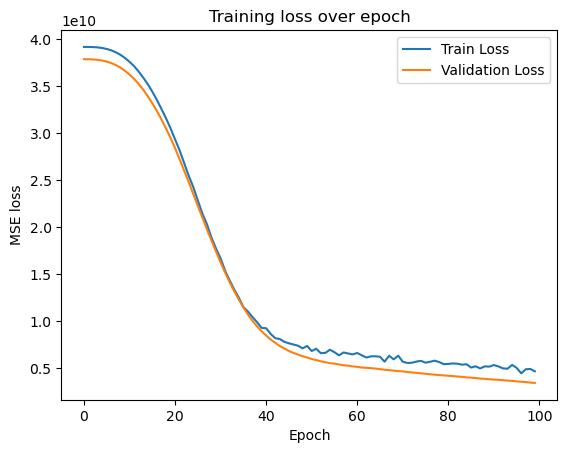

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.legend()
plt.title("Training loss over epoch")
plt.show()


In [ ]:
sample = np.array([[7,1710,2,548,856,2,2003]])

sample_scaled = scaler.tranform(sample)
predicted_price